<a href="https://colab.research.google.com/github/davidmtzv14/Actividad-Integradora1/blob/main/Equipo_4_Actividad_Integradora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

#Source URL
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
 
soup = BeautifulSoup(page.content,'html.parser')
 
#Data cleaning
#Getting dates
s = soup.find_all('script')
script = s[21].string
startIndexDates = script.index('categories: ["') + len('categories: ["')
endIndexDates = script.index('"]')
datesArrayString = script[startIndexDates:endIndexDates]
datesArray = datesArrayString.split('","')
 
#Getting number of cases per date
startIndexSubstring = script.index("data: [null,271,475,") + len("data: [")
substringData = script[startIndexSubstring:]
endIndexData = substringData.index(']')
dataArrayString = substringData[:endIndexData]
dataArray = dataArrayString.split(',')
for i in range(0,len(dataArray)):
    if dataArray[i] == 'null':
        dataArray[i] = 0
    else:
        dataArray[i] = int(dataArray[i])
 
#Final clean data
covidDailyCases = dict(zip(datesArray,dataArray))
covidDailyCases

{'Apr 01, 2020': 78680,
 'Apr 02, 2020': 81335,
 'Apr 03, 2020': 86648,
 'Apr 04, 2020': 83767,
 'Apr 05, 2020': 74365,
 'Apr 06, 2020': 77948,
 'Apr 07, 2020': 84220,
 'Apr 08, 2020': 89414,
 'Apr 09, 2020': 90806,
 'Apr 10, 2020': 98397,
 'Apr 11, 2020': 86154,
 'Apr 12, 2020': 77054,
 'Apr 13, 2020': 77032,
 'Apr 14, 2020': 80334,
 'Apr 15, 2020': 87097,
 'Apr 16, 2020': 87686,
 'Apr 17, 2020': 89704,
 'Apr 18, 2020': 84856,
 'Apr 19, 2020': 78603,
 'Apr 20, 2020': 83098,
 'Apr 21, 2020': 81597,
 'Apr 22, 2020': 84579,
 'Apr 23, 2020': 86584,
 'Apr 24, 2020': 98250,
 'Apr 25, 2020': 91459,
 'Apr 26, 2020': 75031,
 'Apr 27, 2020': 71817,
 'Apr 28, 2020': 78236,
 'Apr 29, 2020': 81559,
 'Apr 30, 2020': 89488,
 'Aug 01, 2020': 263525,
 'Aug 02, 2020': 227222,
 'Aug 03, 2020': 204530,
 'Aug 04, 2020': 257905,
 'Aug 05, 2020': 276619,
 'Aug 06, 2020': 288020,
 'Aug 07, 2020': 287379,
 'Aug 08, 2020': 274848,
 'Aug 09, 2020': 229246,
 'Aug 10, 2020': 222305,
 'Aug 11, 2020': 271734,
 'Aug

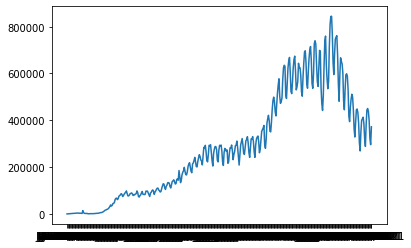

In [ ]:
plt.plot(datesArray,dataArray)

In [ ]:
#Transform the values to a dataframe
import pandas as pd
import numpy as np

covidCases = pd.DataFrame(list(covidDailyCases.items()),columns = ['Date','Values']) 

covidCases

,Date,Values
0,"Jan 22, 2020",0
1,"Jan 23, 2020",271
2,"Jan 24, 2020",475
3,"Jan 25, 2020",701
4,"Jan 26, 2020",787
...,...,...
401,"Feb 26, 2021",437776
402,"Feb 27, 2021",398494
403,"Feb 28, 2021",321776
404,"Mar 01, 2021",295752


In [ ]:
#Convert from datetime to numbers
import datetime as dt
covidCases['Date'] = pd.to_datetime(covidCases['Date'])
covidCases['Date'] = covidCases['Date'].map(dt.datetime.toordinal)
covidCases

,Date,Values
0,737446,0
1,737447,271
2,737448,475
3,737449,701
4,737450,787
...,...,...
401,737847,437776
402,737848,398494
403,737849,321776
404,737850,295752


In [ ]:
#Get values back
MAX = covidCases['Date'].map(pd.Timestamp.fromordinal)
MAX

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
401   2021-02-26
402   2021-02-27
403   2021-02-28
404   2021-03-01
405   2021-03-02
Name: Date, Length: 406, dtype: datetime64[ns]

In [ ]:
#Adjust the values for training
X = covidCases['Date'].to_numpy()
y = covidCases['Values'].to_numpy()
X = X.reshape(-1,1)
print(X.shape)

(406, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Train the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

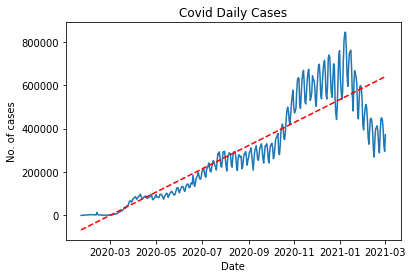

In [ ]:
#Change values back to dates
plt.title('Covid Daily Cases')
plt.xlabel('Date')
plt.ylabel('No. of cases')
plt.plot(MAX,covidCases['Values'])
#Plot function
plt.plot(covidCases['Date'], lr.coef_*covidCases['Date'] + lr.intercept_, color='r', linestyle='dashed')